<a href="https://www.kaggle.com/code/ardaorcun/mlp-from-scratch?scriptVersionId=163433474" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words=open('/kaggle/input/turkish-names-turkce-isimler/isimler.txt', 'r').read().splitlines()
words[:8]

['JALE',
 'ALİ',
 'MAHMUT',
 'MANSUR KÜRŞAD',
 'GAMZE',
 'MİRAÇ',
 'YÜCEL',
 'KUBİLAY']

In [3]:
len(words)

2446

In [4]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i, s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)

{1: ' ', 2: 'A', 3: 'B', 4: 'C', 5: 'D', 6: 'E', 7: 'F', 8: 'G', 9: 'H', 10: 'I', 11: 'J', 12: 'K', 13: 'L', 14: 'M', 15: 'N', 16: 'O', 17: 'P', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'Y', 24: 'Z', 25: 'Ç', 26: 'Ö', 27: 'Ü', 28: 'Ğ', 29: 'İ', 30: 'Ş', 0: '.'}


In [5]:
block_size=3 #context_lenght how many characters do we take to predict the next one?

X,Y=[], []
for w in words:
    context=[0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context=context[1:]+[ix] #crop and append
        
        
X=torch.tensor(X)
Y=torch.tensor(Y)

In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([18108, 3]), torch.int64, torch.Size([18108]), torch.int64)

In [7]:
# ----------- more readable -------------- #

In [8]:
X.shape, Y.shape #dataset

(torch.Size([18108, 3]), torch.Size([18108]))

In [9]:
g=torch.Generator().manual_seed(2024)
C=torch.randn((31,2), generator=g)
w1=torch.randn((6,100), generator=g)
b1=torch.randn(100, generator=g)
w2=torch.randn((100,31), generator=g)
b2=torch.randn(31, generator=g)
parameters=[C, w1, b1, w2, b2]

In [10]:
sum(p.nelement() for p in parameters) #number of params in total

3893

In [11]:
for p in parameters:
    p.requires_grad=True

In [12]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre


In [13]:
lri=[]
lossi=[]
for i in range(10000):
    #minibatch construct
    ix=torch.randint(0, X.shape[0], (36,))
    #forward pass 
    emb=C[X[ix]]
    h=torch.tanh(emb.view(-1,6) @ w1 +b1)
    logits= h @ w2 +b2
    loss=F.cross_entropy(logits, Y[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    #lr=lrs[i]
    lr=0.0075
    for p in parameters:
        p.data += -lr * p.grad
    
    #track stats
    #lri.append(lre[i])
    #lossi.append(loss.item())
    
#print(loss.item())


In [14]:
emb=C[X]
h=torch.tanh(emb.view(-1,6) @ w1 +b1)
logits= h @ w2 +b2
loss=F.cross_entropy(logits, Y)
loss

tensor(2.4859, grad_fn=<NllLossBackward0>)

In [15]:
def build_dataset(words):
    block_size=3 #context_lenght how many characters do we take to predict the next one?

    X,Y=[], []
    for w in words:
        context=[0]*block_size
        for ch in w + '.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context=context[1:]+[ix] #crop and append


    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y
    
import random 
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([14517, 3]) torch.Size([14517])
torch.Size([1806, 3]) torch.Size([1806])
torch.Size([1785, 3]) torch.Size([1785])


In [16]:
Xtr.shape, Ytr.shape #dataset

(torch.Size([14517, 3]), torch.Size([14517]))

In [17]:
g=torch.Generator().manual_seed(2024)
C=torch.randn((31,10), generator=g) #2 ,10 etc.
w1=torch.randn((30,100), generator=g) #100 , 200 ,300 change as you like
b1=torch.randn(100, generator=g)
w2=torch.randn((100,31), generator=g)
b2=torch.randn(31, generator=g)
parameters=[C, w1, b1, w2, b2]

In [18]:
sum(p.nelement() for p in parameters) #number of params in total

6541

In [19]:
for p in parameters:
    p.requires_grad=True

In [20]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre


In [21]:
lri=[]
lossi=[]
stepi=[]

In [22]:

for i in range(50000):
    #minibatch construct
    ix=torch.randint(0, Xtr.shape[0], (36,))
    #forward pass 
    emb=C[Xtr[ix]]
    h=torch.tanh(emb.view(-1,30) @ w1 +b1)
    logits= h @ w2 +b2
    loss=F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    #lr=lrs[i]
    lr=0.075
    for p in parameters:
        p.data += -lr * p.grad
    
    #track stats
    #lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)
    
print(loss.item())


1.302411675453186


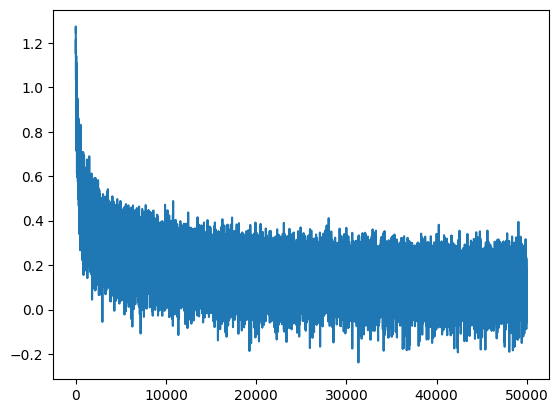

In [23]:
plt.plot(stepi, lossi)

In [24]:
emb=C[Xtr]
h=torch.tanh(emb.view(-1,30)@w1+b1)
logits=h@w2+b2
loss=F.cross_entropy(logits, Ytr)
loss

tensor(1.3242, grad_fn=<NllLossBackward0>)

In [25]:
emb=C[Xdev]
h=torch.tanh(emb.view(-1,30)@w1+b1)
logits=h@w2+b2
loss=F.cross_entropy(logits, Ydev)
loss

tensor(1.9100, grad_fn=<NllLossBackward0>)

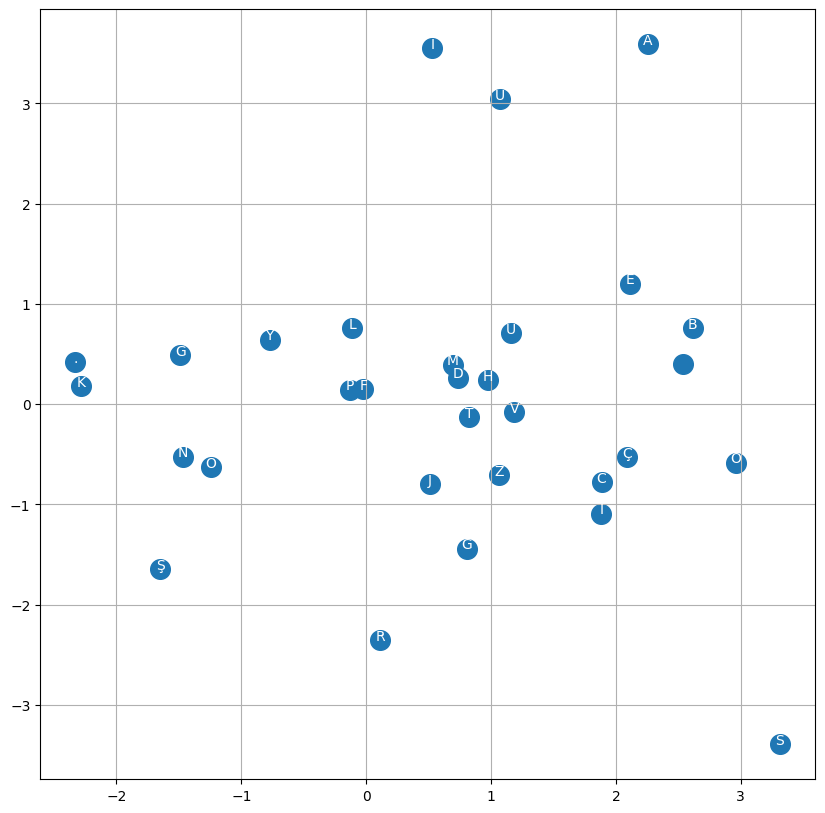

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", color='white')
plt.grid('minor')

In [27]:
g=torch.Generator().manual_seed(31313131)

for _ in range(20):
    out=[]
    context=[0]*block_size
    while True:
        emb=C[torch.tensor([context])]
        h=torch.tanh(emb.view(1,-1)@w1+b1)
        logits=h@w2+b2
        probs=F.softmax(logits, dim=1)
        ix=torch.multinomial(probs, num_samples=1, generator=g).item()
        context=context[1:]+[ix]
        out.append(ix)
        if ix==0:
            break
    print(''.join(itos[i] for i in out))

ERAL.
AYDULGE HALİL.
HAYRUN.
YUSUF EŞUR.
ERCA.
MERVE SELAMİ.
AYŞE.
MEHMUT.
CAN.
SELİN.
RUKİY ARDEM.
SELA.
SENİZ.
EMRE.
ALPER.
ÖZLEM.
HİLAL.
BURETTİN.
UFUK.
ERİME.
